# Case_study_5_Clustering

In [32]:
from pathlib import Path

import os 
os.environ["OMP_NUM_THREADS"] = "1" # This is done to set 
# OMP_NUM_THREADS to 1 for comparison of various k in 
# k-Means clustering.

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from pandas.plotting import parallel_coordinates

%matplotlib inline
import matplotlib.pylab as plt

In [33]:
rates_df= pd.read_csv('Crime.csv')
print("The number of rows and columns in the dataframe are: ", rates_df.shape)


The number of rows and columns in the dataframe are:  (50, 8)


In [34]:
print("The first 10 records of the dataframe are:")
rates_df.head(10)

The first 10 records of the dataframe are:


,States,murder,rape,robbery,assault,burglary,larceny,auto
0,ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,GEORGIA,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


In [35]:
# Set row names (index) to 'States'.
rates_df.set_index('States', inplace=True)

# Display records of rates_df data frame after setting row names (index)
rates_df.head(10)

,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4


In [36]:
# Compute Euclidean distance matrix, metric='euclidean'.
# To compute other metrics, e.g., 'cityblock', 'cosine', 
# 'manhattan', etc., change the name of metric argument.
# d = pairwise.pairwise_distances(rates_df, metric='euclidean')
d_round = np.round(pairwise.pairwise_distances(rates_df, metric='euclidean'), 
          decimals=2)

# Display distance matrix for rates_df data frame. 
pd.DataFrame(d_round, columns=rates_df.index, index=rates_df.index).head(5)

States,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,FLORIDA,GEORGIA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
States,,,,,,,,,,,,,,,,,,,,,
ALABAMA,0.00,1573.67,2859.82,205.49,1953.22,2183.98,842.91,1890.03,2098.47,363.76,...,624.51,188.72,1210.54,1132.58,428.11,668.31,1579.75,795.90,819.44,954.88
ALASKA,1573.67,0.00,1528.08,1653.53,847.94,854.79,782.61,559.25,835.33,1284.48,...,1934.99,1657.13,595.46,595.74,1282.09,1063.78,483.26,2245.50,1068.51,930.62
ARIZONA,2859.82,1528.08,0.00,2958.82,1026.46,700.06,2113.55,1038.22,811.40,2508.05,...,3303.28,2906.68,1658.74,1887.47,2493.84,2388.73,1315.61,3600.41,2408.22,2298.31
ARKANSAS,205.49,1653.53,2958.82,0.00,2083.24,2279.22,943.53,1972.06,2191.13,507.37,...,441.17,332.77,1310.54,1170.97,525.36,661.81,1660.77,653.11,776.90,930.98
CALIFORNIA,1953.22,847.94,1026.46,2083.24,0.00,506.97,1218.33,568.80,556.62,1598.44,...,2462.90,1977.34,812.62,1176.02,1613.79,1598.12,663.47,2723.60,1671.55,1591.80


## Normalization

In [37]:
# There are two ways to normalize the input variables. 
# Scikit-learn uses the population standard deviation,
# wheres Pandas calculates by default the sample standard deviation. 
# The normalized data from the two methods will therefore differ slightly. 
# We will use the Pandas approach as more appropriate for cluster analysis.

# Scikit-learn uses population standard deviation, will not be used
# in this cluster analysis. 

rates_df_norm = (rates_df - rates_df.mean())/rates_df.std()
rates_df_norm_round = np.round((rates_df - rates_df.mean())/rates_df.std(), 
                          decimals=2)

# Display records of data frame.
print('Normalized Input Variables for seven crimes')
rates_df_norm_round.head(10)

Normalized Input Variables for seven crimes


,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,1.75,-0.05,-0.31,0.67,-0.36,-1.09,-0.50
ALASKA,0.87,2.40,-0.31,0.73,0.09,0.96,1.94
ARIZONA,0.53,0.79,0.16,1.01,2.44,2.47,0.32
ARKANSAS,0.35,0.17,-0.46,-0.08,-0.74,-1.11,-1.00
CALIFORNIA,1.05,2.20,1.84,1.46,1.96,1.14,1.48
COLORADO,-0.30,1.51,0.53,0.81,1.49,1.70,0.51
CONNECTICUT,-0.84,-0.83,0.06,-0.79,0.13,-0.07,1.12
DELAWARE,-0.37,-0.08,0.37,-0.17,0.90,1.39,0.46
FLORIDA,0.71,1.29,0.72,2.37,1.31,1.61,-0.14


## Develop and plot hierachical dendrograms for different measures of distance between clusters. 

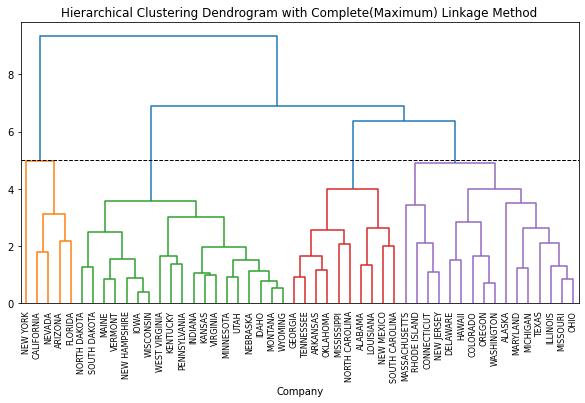

In [38]:
# Develop hierachical (agglomerative) clustering complete 
# linkage (maximum  distance) for clustering. 
hi_complete= linkage(rates_df_norm, method='complete')

# Plot hierachical clustering dendrogram with complete linkage
# measure of distance between clusters. 

# Develop plot parameters, title and labels. 
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram with Complete(Maximum) Linkage Method')
plt.xlabel('Company')

# Use dendrogram() function to develop hierachical clustering deondrogram
# clusters with complete linkage. 
# 'color_threshold = 5.0' represents the threshold of cluster development. 
# It is a normalized distance between clusters (5.0), at which the 
# agglomeration of records into clusters will stop. 
# The higher this value, the less clusters will be created. +
dendrogram(hi_complete, labels=rates_df_norm.index, color_threshold=5.0)

# Develop the horizontal line representing the cluster development
# threshold (5) and plot the dendrogram.
plt.axhline(y=5.0, color='black', linewidth=1.0, linestyle='dashed')
plt.show()

## Cluster membership,  cluster means and profile plots for clusters with complete (Maximum) linkage. 

In [45]:
# Develop cluster membership for agglomerative clustering using Complete(Maximum) 
# linkage method. The number of clusters is assigned to be 4 as shown
# in the dendrogram with Complete(Maximum) linkage.  
memb_comp = fcluster(hi_complete, 4, criterion='maxclust')
memb_comp = pd.Series(memb_comp, index=rates_df_norm.index)

# Display cluster memberships for 4 clusters.  
print('Cluster Membership for 4 Clusters (based on the number of clusters received in the dendrogram) Using complete Linkage Method')
for key, item in memb_comp.groupby(memb_comp):
    print(key, ' : ',' , '.join(item.index))

Cluster Membership for 4 Clusters (based on the number of clusters received in the dendrogram) Using complete Linkage Method
1  :  ARIZONA , CALIFORNIA , FLORIDA , NEVADA , NEW YORK
2  :  IDAHO , INDIANA , IOWA , KANSAS , KENTUCKY , MAINE , MINNESOTA , MONTANA , NEBRASKA , NEW HAMPSHIRE , NORTH DAKOTA , PENNSYLVANIA , SOUTH DAKOTA , UTAH , VERMONT , VIRGINIA , WEST VIRGINIA , WISCONSIN , WYOMING
3  :  ALABAMA , ARKANSAS , GEORGIA , LOUISIANA , MISSISSIPPI , NEW MEXICO , NORTH CAROLINA , OKLAHOMA , SOUTH CAROLINA , TENNESSEE
4  :  ALASKA , COLORADO , CONNECTICUT , DELAWARE , HAWAII , ILLINOIS , MARYLAND , MASSACHUSETTS , MICHIGAN , MISSOURI , NEW JERSEY , OHIO , OREGON , RHODE ISLAND , TEXAS , WASHINGTON


In [40]:
# Identify  and display cluster normalized mean values 
# for each of 7 input variables (measurements).

# Create data frame with normalized cluster means for each 
# cluster and each input variable (measurement). 
clust_mean_norm = rates_df_norm.groupby(memb_comp).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Normalized Means of Input Variables for Clusters with Complete Linkage Method')
clust_mean_norm

Normalized Means of Input Variables for Clusters with Complete Linkage Method


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
1,1.059,1.357,1.785,1.470,1.881,1.500,0.902,Cluster 1
2,-0.753,-0.801,-0.734,-0.852,-0.828,-0.479,-0.623,Cluster 2
3,1.036,0.233,-0.244,0.704,-0.149,-0.785,-0.617,Cluster 3
4,-0.084,0.382,0.467,0.113,0.489,0.590,0.844,Cluster 4


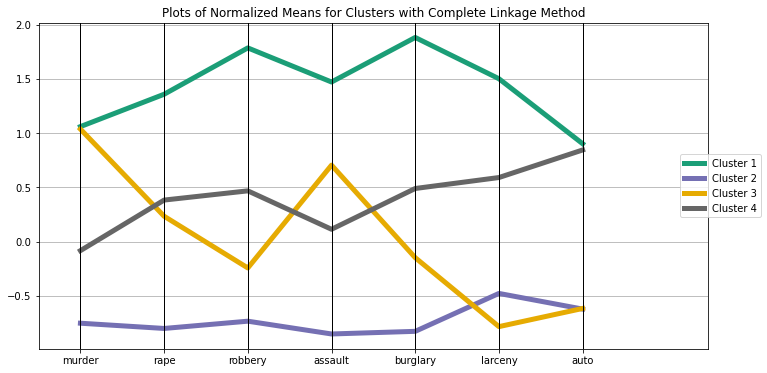

In [41]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Complete Linkage Method')
plt.show()

## k-Means clustering of crime rate records into 5 clusters. 

In [42]:
# Create data frame for Crimes data set.
rates_df= pd.read_csv('Crime.csv')

# Set row names (index) to 'states', which is Utilities
# data column name. 
rates_df.set_index('States', inplace=True)

# While not required, the conversion of integer data to float 
# will avoid a warning when applying the normalization function.
rates_df = rates_df.apply(lambda x: x.astype('float64'))

# Normalize the input variables using Pandas sample standard deviation. 
rates_df_norm = (rates_df - rates_df.mean())/rates_df.std()

# Use KMeans() function to create k-means clusters with k=5 (n_clusters=5). 
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(rates_df_norm)

# Develop cluster membership for k-means clusters, k=5.
memb_km5 = pd.Series(kmeans_5.labels_, index=rates_df_norm.index)

# Display cluster memberships for 5 clusters.  
print('Cluster Membership for 5 Clusters Using k-Means Clustering')
print()
for key, item in memb_km5.groupby(memb_km5):
    print(key, ': ', ', '.join(item.index))

Cluster Membership for 5 Clusters Using k-Means Clustering

0 :  ALABAMA, ARKANSAS, GEORGIA, LOUISIANA, MISSISSIPPI, MISSOURI, NEW MEXICO, NORTH CAROLINA, OKLAHOMA, SOUTH CAROLINA, TENNESSEE, TEXAS, VIRGINIA
1 :  IDAHO, IOWA, KANSAS, KENTUCKY, MAINE, MINNESOTA, MONTANA, NEBRASKA, NEW HAMPSHIRE, NORTH DAKOTA, PENNSYLVANIA, SOUTH DAKOTA, UTAH, VERMONT, WEST VIRGINIA, WISCONSIN, WYOMING
2 :  ALASKA, ARIZONA, COLORADO, DELAWARE, FLORIDA, HAWAII, MARYLAND, MICHIGAN, OREGON, WASHINGTON
3 :  CONNECTICUT, ILLINOIS, INDIANA, MASSACHUSETTS, NEW JERSEY, OHIO, RHODE ISLAND
4 :  CALIFORNIA, NEVADA, NEW YORK


## Elbow chart

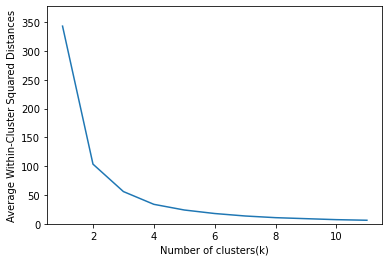

In [43]:
# Develop Elbow chart to identify appropriate k in k-Means
# clustering.

# Identify average with-cluster squred distances for k-Means 
# clusters, number of clusters k varies from 1 to 12. 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(rates_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster 
# squared distances using k-Means clusters with number of clusters k 
# from 1 to 12. 
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

## Cluster centroids and profile plots of centroids for k-means clustering with k = 5.

In [44]:
# Identify  and display cluster centroids (mean values)  
# for each of 7 input variables (measurements).  

# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_5.cluster_centers_, 
                    columns=rates_df_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 5')
centroids

Cluster Centroids for k-Means Clustering with k = 5


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
0,0.987,0.238,-0.134,0.521,-0.109,-0.612,-0.526,Cluster 0
1,-0.865,-0.887,-0.799,-0.892,-0.856,-0.509,-0.650,Cluster 1
2,0.053,1.056,0.478,0.627,0.997,1.336,0.479,Cluster 2
3,-0.388,-0.471,0.359,-0.265,0.049,-0.024,1.256,Cluster 3
4,1.351,1.571,2.680,1.324,1.884,1.139,1.441,Cluster 4


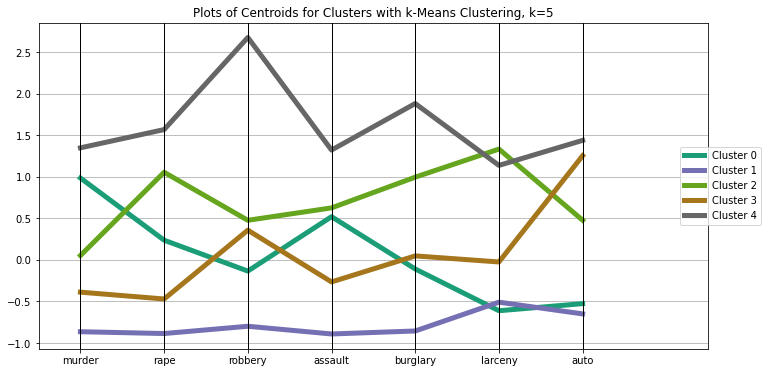

In [31]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=5')
plt.show()